In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing our dataset from the desired location 
#Creating the dataframe
df=pd.read_csv('dataset.csv')

In [3]:
#displaying the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
# displaying the first five record of our dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# **EDA**

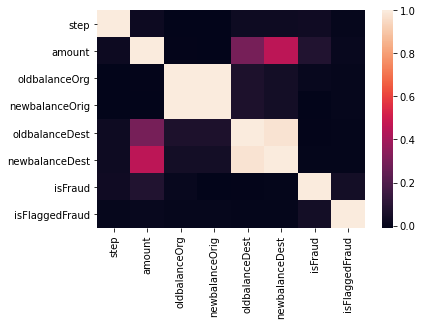

In [6]:
#displaying the heat-map of correlation among each columns
sns.heatmap(df.corr())

In [1]:
#checking whether there is any null value or not aand displaying the respective heatmap
#sns.heatmap(df.isnull())

In [ ]:
#calculating number of fraud transfers
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
len(dfFraudTransfer)

In [ ]:
#calculating number of frauds in cash_out
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')] 
len(dfFraudCashout)

In [ ]:
#calculating number of transfers which are greater than 2,00,000
df[df['isFlaggedFraud']==1].count()['isFlaggedFraud']

In [ ]:
#displaying maximum amount of non fraud user
df[df['isFlaggedFraud']==0].max()['amount']

In [ ]:
#drop it because wrong(since transfered amount is greater than 2,00,000 so flagged fraud)
df[df['isFlaggedFraud']==1].min()['amount']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y='amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y='oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0,0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y='oldbalanceOrg', data = tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0,0.3e7))
d = sns.regplot(x = 'oldbalanceOrg', y='amount', data = tmp.loc[(tmp.isFlaggedFraud == 1), :], ax=axs[1][1])
plt.show()

In [ ]:
#displaying the factor plots
sns.factorplot(x="type",col='isFraud',data = df,kind= 'count',size=7,aspect=.7)

#counting total no. of enteries in 'is Fraud' column
q=df.count()['isFraud']
#Finding no.transactions where amount is not 0, both new and old balance destination is 0 but when it is not fraud
p=len(df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount) & (df.isFraud == 0)])
#calculating fractions of such above transactions
print((p/q)*100)
#Finding no.transactions where amount is not 0, both new and old balance destination is 0 but when it is not fraud
r=len(df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount) & (df.isFraud == 1)])
#calculating fractions of such above transactions
print((r/q)*100)

# **Data Cleaning**

In [ ]:
#We have analysed that fraud transaction exists only for 'TRANSFER' and 'CASH_OUT'
#Creating a new dataset containing only transfer and cash-outs
X= df.loc[(df['type'] == 'TRANSFER') | (df['type']== 'CASH_OUT') ]


In [ ]:
#displaying the first 5 data of x
X.head()

In [ ]:
#Eliminate columns shown to be irrelevant for analysis in the EDA
X.drop(['nameOrig','nameDest','isFlaggedFraud','step'],axis =1,inplace=True)

X.head()

X.columns

In [ ]:
#converting the categorical values into binary values for the column 'type'
typee = pd.get_dummies(X['type'],drop_first= True)
#storing the new dataset in 'NewData' after concatinating with the type column
NewData = pd.concat([X,typee],axis = 1)
# dropping the type column as we don't need the categorical values any more, rather the binary ones
NewData.drop(['type'],inplace=True,axis=1)


NewData.head()

NewData.head()

In [ ]:
#displaying the heat map of correlation
sns.heatmap(NewData.corr(),annot=True,cmap='viridis')

# Under-Sampling

# displaying the countplot
sns.countplot(x='isFraud' ,data=NewData)

In [ ]:
#from the countplot we observe that dataset is imbalanced
#Hence we move on to balance the data
#Calculating the number of fraud transactions in our new calculated dataset
frauds =len(NewData[NewData['isFraud'] == 1])
#Storing the corresponding to the fraud transaction indices
fraud_indices = NewData[NewData.isFraud == 1].index
#Storing the corresponding to the non fraud transaction indices
non_fraud_indices = NewData[NewData.isFraud == 0].index

In [ ]:
#calculating the number of non fraud transcations
non_frauds = len(NewData[NewData['isFraud'] == 0])
#we randomly choose from non-fraud-indices , such that its number equals with no. of fraud ones
np.random.seed(0)
random_indices = np.random.choice(non_fraud_indices,frauds, replace=False)
len(random_indices)

In [ ]:
#random indices and fraud indices are concanated and we obtain the indices we require for our new balanced dataset
under_sample_indices = np.concatenate([random_indices,fraud_indices],axis=0)
len(under_sample_indices)

In [ ]:
#Obtaining the new final balanced data-set using the indices obtained in the previous dataset
under_sample = NewData.loc[under_sample_indices]
under_sample.reset_index(inplace=True,drop=True)
under_sample.head()

In [ ]:
#calculating the number of non fraud transactions in under sampled dataset
under_sample[under_sample['isFraud']==0].count()

In [ ]:
#displaying the counplot
sns.countplot(x='isFraud',data=under_sample)

# **contrary to the previous counter plots both the frauds and the non-frauds cover equal area under the curves**


In [ ]:
#displaying the heatmap of correlation
sns.heatmap(under_sample.corr(),annot=True)

In [ ]:
#Joint-plot of'amount' vs. 'isFraud'
sns.jointplot(x='amount',y='isFraud',data=under_sample)
sns.lmplot(x='oldbalanceOrg',y='isFraud',data=under_sample)

# **Training our Model**

In [ ]:
#choosing our dependent and independent variables,respectively
y = under_sample['isFraud']
x = under_sample[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest',
                 'newbalanceDest','TRANSFER']]
from sklearn.model_selection import train_test_split

In [ ]:
#Choosing training data to be 30% and rest as our testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

#creating object for Logistic regression
lr_under = LogisticRegression()

#providing datas to train the machine
lr_under.fit(x_train,y_train)

#storing the predicted values
y_under_pred = lr_under.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix

#printing the classification report
print(classification_report(y_test,y_under_pred))

# we find model accuracy to be 93%. Hence we can accept the model

In [ ]:
#printing the confusion matrix
print(confusion_matrix(y_test,y_under_pred))

In [ ]:
#Cross-validation of our model
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=lr_under,X=x_train,y=y_train)
accuracies.mean()

from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(y_under_pred,y_test,drop_intermediate=False)

plt.figure()

In [ ]:
#plotting the ROC curve
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--',label= 'Normal Curve')
##Title and label
plt.xlabel('False Posative')
plt.ylabel('True Posative')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Finding the area under ROC curve
from sklearn import metrics
metrics.auc(fpr, tpr)

# **KNN ALGORITHM**

In [ ]:
from sklearn.preprocessing import StandardScaler 

#creating standardscalar
scalar = StandardScaler()


#scaling the dataset o make the mean 0 and standard deviation 1 
scalar.fit(x)

scaled_features = scalar.transform(x)

#creating a new dataset after transforming the old data set 
df_feat = pd.DataFrame(scaled_features,columns = x.columns) 
df_feat.head()

In [ ]:
# Defining of dependent and independent variables,respectively
x1=df_feat[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest', 'TRANSFER']] 
y1=under_sample['isFraud']

#30% of the data is used for testing and remaining 705 is used for training
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=101)


from sklearn.neighbors import KNeighborsClassifier 

#creating object with 1 neighbour hence predicting the results
Knn=KNeighborsClassifier(n_neighbors=1) 
Knn.fit(x1_train,y1_train)
pred=Knn.predict(x1_test) 
pred


#printing the confuusion matrix 
print(confusion_matrix(y1_test,pred))

In [ ]:

#printing the classification report 
print(classification_report(y1_test,pred))

#we find that our knn model is 96% accurate. Hence it can be accepted.
 
#calculating the error rate for different values of 'n-neighbours' 
error_rate=[]
for i in range(1,30): 
    Knn=KNeighborsClassifier(n_neighbors=i) 
    Knn.fit(x1_train,y1_train) 
    pred_i=Knn.predict(x1_test) 
    error_rate.append(np.mean(pred_i!=y1_test))
plt.figure(figsize=(10,6)) 
plt.plot(range(1,30),error_rate,linestyle='dashed',marker='o',markersize=10)

#  the graph shows that knn has least error when number of neighbours selected is 1 which we have already selected 

In [ ]:
#Performing cross-validation on our selected model
from sklearn.model_selection import cross_val_score 
accuracies=cross_val_score(estimator=Knn,X=x1_train,y=y1_train) 
accuracies.mean()



fpr1, tpr1,_=roc_curve(pred,y1_test,drop_intermediate=False) 
plt.figure()

#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
##Title and label
plt.xlabel('False Posative') 
plt.ylabel('True Posative') 
plt.title('ROC curve') 
plt.show()

In [ ]:
#Finding area under ROC curve 
metrics.auc(fpr1,tpr1)

# SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC 
#Creating SVM object
model = SVC()


#Training of model 
model.fit(x_train,y_train)

#Prediction using SVM
pred = model.predict(x_test)



#Confusion matrix display 
print(confusion_matrix(y_test,pred))

In [ ]:
#Classification report of our SVM model 
print(classification_report(y_test,pred))

In [ ]:
#Cross-validation of our SVM model
from sklearn.model_selection import cross_val_score 
accuracies=cross_val_score(estimator=model,X=x_train,y=y_train) 
accuracies.mean()


#We try to improve our SVM model by using GridSearhCV 
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

#Training the model using grid search 
grid.fit(x_train,y_train)



#Finding best parameter for grid_search 
grid.best_params_



#Finding best estimator for grid search 
grid.best_estimator_ 
grid_pred=grid.predict(x_test)

#Displaying of classification report 
print(classification_report(y_test,grid_pred))

#Displaying the confusion matrix 
print(confusion_matrix(y_test,grid_pred))

In [ ]:

#Cross-validation of our model
from sklearn.model_selection import cross_val_score 
accuracies=cross_val_score(estimator=grid,X=x_train,y=y_train) 
print(accuracies.mean())


#We find that SVM has very low accuracy,even by using GridSearch hence we discard this model.

# GAUSSIAN NAIVE CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

#creating an object
model=GaussianNB()

#providing data to train the machine
model.fit(x_train,y_train) 
predicted=model.predict(x_test)

#displaying the predicted values after prediction 
print(predicted)

In [ ]:
#printing the confusion matrix and classification report 
print(confusion_matrix(y_test,predicted))

In [ ]:
print(classification_report(y_test,predicted))

In [ ]:
#Cross-Validation of our model
from sklearn.model_selection import cross_val_score 
accuracies=cross_val_score(estimator=model,X=x_train,y=y_train) 
accuracies.mean()


fpr1, tpr1,_=roc_curve(predicted,y_test,drop_intermediate=False) 
plt.figure()

In [ ]:
#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Posative')
plt.ylabel('True Posative') 
plt.title('ROC curve') 
plt.show()

In [ ]:
#Calculating the area under above ROC curve 
metrics.auc(fpr1,tpr1)

#we find from our classification report, our accuracy is 80% and our cross validation score is approx 0.72 
#As, both are quite less we don't prefer this model.

# DECISION TREES

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#creating object and providing training data 
dtree=DecisionTreeClassifier() 
dtree.fit(x_train,y_train)

#Predicting frim our model 
pre=dtree.predict(x_test)

#displaying the classification report and confusion matrix 
print(confusion_matrix(y_test,pre)) 

In [ ]:
print(classification_report(y_test,pre))

In [ ]:
#We find that our accuracy is quite high, to be 99%. we further cross-validate our model. 
#Cross-validation of our model
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=dtree,X=x_train,y=y_train,cv=10) 
accuracies.mean()


fpr1, tpr1,_=roc_curve(pre,y_test,drop_intermediate=False) 
plt.figure()

In [ ]:
#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
##Title and label
plt.xlabel('False Posative') 
plt.ylabel('True Posative') 
plt.title('ROC curve') 
plt.show()

In [ ]:
#Finding area under ROC curve 
metrics.auc(fpr1,tpr1)

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#creating an object for random forest having 1000 as parameter for n_estimators 
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)


#prediction using this model 
rfc_pred=rfc.predict(x_test)
#displaying the confusion matrix and classification report 
print(confusion_matrix(y_test,rfc_pred)) 

In [ ]:
print(classification_report(y_test,rfc_pred))

In [ ]:
#we find that our model has 99% accuracy 
#cross-validation of our model
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=rfc,X=x_train,y=y_train,cv=10) 
accuracies.mean()


fpr1, tpr1,_=roc_curve(rfc_pred,y_test,drop_intermediate=False) 
plt.figure()

In [ ]:
#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
##Title and label
plt.xlabel('False Posative') 
plt.ylabel('True Posative') 
plt.title('ROC curve') 
plt.show()

In [ ]:
#Finding area under ROC curve 
metrics.auc(fpr1,tpr1)

# We finally find that the 'Decision Tree' or the 'Random Forest Classifier' model has the best accuracy. Hence we choose it.